<a href="https://colab.research.google.com/github/Somyadhariwal/SD_MLAP/blob/main/3_Somya_Dhariwal_20A1HP033.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/rssmahesh1/MLAP2021Exam/main/MALP2021%20Question%20paper/customerspends.csv")
df.head()

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [50]:
df

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.70
1,2,15.23,5.50
2,3,5.22,18.60
3,4,31.10,1.80
4,5,6.12,21.50
5,6,14.50,8.20
6,7,8.50,16.20
7,8,26.50,2.20
8,9,4.34,17.70
9,10,13.75,7.30


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform( df[['Apparel',
                                                              'Beauty and Healthcare', 
                                                ]] )

In [52]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_df )
df["clusterid_new"] = clusters_new.labels_

In [53]:
df

,Customer,Apparel,Beauty and Healthcare,clusterid_new
0,1,21.10,0.70,2
1,2,15.23,5.50,0
2,3,5.22,18.60,1
3,4,31.10,1.80,2
4,5,6.12,21.50,1
5,6,14.50,8.20,0
6,7,8.50,16.20,1
7,8,26.50,2.20,2
8,9,4.34,17.70,1
9,10,13.75,7.30,0


Finding Optimal Number of Clusters using Elbow Method

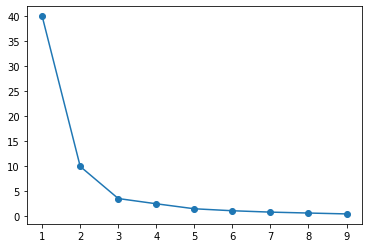

In [54]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

In [55]:
k = 5
clusters = KMeans( k, random_state=42 )
clusters.fit( scaled_df )
df["clusterid"] = clusters.labels_

In [56]:
df[df.clusterid == 0]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
2,3,5.22,18.6,1,0
4,5,6.12,21.5,1,0
6,7,8.50,16.2,1,0
8,9,4.34,17.7,1,0
10,11,5.20,16.2,1,0
12,13,4.40,19.4,1,0
13,14,4.25,15.5,1,0
15,16,7.90,18.8,1,0


In [57]:
df[df.clusterid == 1]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
3,4,31.1,1.8,2,1
7,8,26.5,2.2,2,1
17,18,30.6,1.9,2,1


In [58]:
df[df.clusterid == 2]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
1,2,15.23,5.50,0,2
5,6,14.50,8.20,0,2
9,10,13.75,7.30,0,2
11,12,14.20,2.90,0,2
16,17,13.40,4.20,0,2
18,19,14.40,6.28,0,2


In [59]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

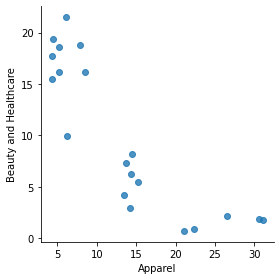

In [60]:
sn.lmplot( "Apparel", "Beauty and Healthcare", df, fit_reg = False, size = 4 );

Normalizing the features

In [61]:
from sklearn.preprocessing import StandardScaler


Cluster Centers and Interpreting the Clusters


In [63]:
df.groupby( 'clusterid' )['Apparel',
'Beauty and Healthcare'].agg( ["mean",
'std'] ).reset_index()

clusterid    Apparel           Beauty and Healthcare          
                  mean       std                  mean       std
0         0   5.741250  1.646003             17.987500  2.001027
1         1  29.400000  2.523886              1.966667  0.208167
2         2  14.246667  0.635662              5.730000  1.963212
3         3  21.700000  0.848528              0.800000  0.141421
4         4   6.250000       NaN              9.980000       NaN

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform( df[['Apparel',
                                                'Beauty and Healthcare']] )

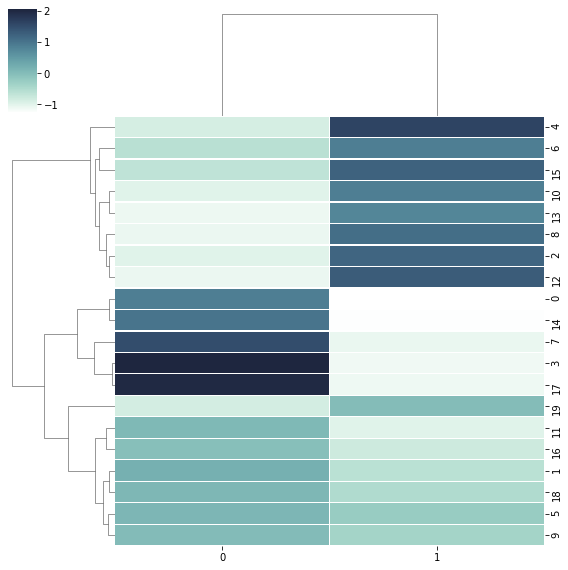

In [68]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_df, cmap=cmap, linewidths=.2,
              figsize = (8,8) );

In [69]:
df.iloc[[10,16]]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
10,11,5.2,16.2,1,0
16,17,13.4,4.2,0,2


In [70]:
df.iloc[[2,18]]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
2,3,5.22,18.60,1,0
18,19,14.40,6.28,0,2
